# EXPLORATORY DATA ANALYSIS FOR DIFFERENT USAGE OF MOBILE HEALTH APPLICATION

## Importing Libraries

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
sns.set(style='white',color_codes=True)
%matplotlib inline
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import itertools
#import random

#from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


## Reading the Dataset

In [2]:
#Read in the dataset
df1 = pd.read_csv('C:/datasets/mHealth.csv', encoding = 'latin1')
#Latin 1 encoding is to interpret special character, to read in the file without producing error
df1


MID             DAY  SEX   AGE  GEN   PRE  ARE  JOB  MAR  CHI  \
0              NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
1     1.000003e+09  6/8/2022 20:58  2.0  56.0  6.0  14.0  3.0  8.0  2.0  1.0   
2              NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
3     1.000004e+09  6/8/2022 22:17  1.0  64.0  7.0  13.0  3.0  6.0  2.0  1.0   
4              NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
...            ...             ...  ...   ...  ...   ...  ...  ...  ...  ...   
1677  1.010023e+09  6/8/2022 19:31  2.0  42.0  5.0  23.0  4.0  9.0  1.0  2.0   
1678           NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
1679  1.010023e+09  6/8/2022 19:20  2.0  48.0  5.0   3.0  2.0  3.0  2.0  1.0   
1680           NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
1681  1.010036e+09  6/8/2022 19:13  1.0  47.0  5.0  42.0  8.0  4.0  2.0  1.0   

      ... q4s7  q4s8  q4s9  q4s10  q4s11  q4s12 q4s13  q4s14  q4s15   q5  
0     ...  NaN   NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN  NaN  
1     ...  4.0   3.0   3.0    3.0    4.0    3.0   3.0    3.0    3.0  3.0  
2     ...  NaN   NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN  NaN  
3     ...  3.0   3.0   3.0    3.0    3.0    3.0   3.0    3.0    3.0  3.0  
4     ...  NaN   NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN  NaN  
...   ...  ...   ...   ...    ...    ...    ...   ...    ...    ...  ...  
1677  ...  5.0   5.0   5.0    5.0    2.0    5.0   5.0    5.0    5.0  3.0  
1678  ...  NaN   NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN  NaN  
1679  ...  2.0   2.0   2.0    2.0    2.0    3.0   2.0    2.0    3.0  3.0  
1680  ...  NaN   NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN  NaN  
1681  ...  2.0   3.0   3.0    2.0    1.0    3.0   3.0    2.0    2.0  3.0  

[1682 rows x 33 columns]

In [3]:
df2 = df1.drop("q3t6", axis=1)#Drop"q3t6" column from the dataframe
print (df2.count())#Returns the number of non null values in each data frame column

MID      841
DAY      841
SEX      841
AGE      841
GEN      841
PRE      841
ARE      841
JOB      841
MAR      841
CHI      841
q1t1     413
q2c1     841
q2c2     841
q2c3     841
q2c4     841
q3       632
q4s1     632
q4s2     632
q4s3     632
q4s4     632
q4s5     632
q4s6     632
q4s7     632
q4s8     632
q4s9     632
q4s10    632
q4s11    632
q4s12    632
q4s13    632
q4s14    632
q4s15    632
q5       632
dtype: int64


In [4]:
df2.head() #Display the first five rows in the dataset

MID             DAY  SEX   AGE  GEN   PRE  ARE  JOB  MAR  CHI  \
0           NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
1  1.000003e+09  6/8/2022 20:58  2.0  56.0  6.0  14.0  3.0  8.0  2.0  1.0   
2           NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   
3  1.000004e+09  6/8/2022 22:17  1.0  64.0  7.0  13.0  3.0  6.0  2.0  1.0   
4           NaN             NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN   

   ... q4s7  q4s8  q4s9  q4s10  q4s11  q4s12  q4s13  q4s14  q4s15   q5  
0  ...  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
1  ...  4.0   3.0   3.0    3.0    4.0    3.0    3.0    3.0    3.0  3.0  
2  ...  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  
3  ...  3.0   3.0   3.0    3.0    3.0    3.0    3.0    3.0    3.0  3.0  
4  ...  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  NaN  

[5 rows x 32 columns]

## Data Cleaning

In [5]:
#To drop duplicate value
df2 = df2.drop_duplicates()
df2.info()#Summary of a ssdataframe(total number of rows in the dataset, names of the columns, their datatype, and any missing value.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 1681
Data columns (total 32 columns):
MID      841 non-null float64
DAY      841 non-null object
SEX      841 non-null float64
AGE      841 non-null float64
GEN      841 non-null float64
PRE      841 non-null float64
ARE      841 non-null float64
JOB      841 non-null float64
MAR      841 non-null float64
CHI      841 non-null float64
q1t1     413 non-null object
q2c1     841 non-null float64
q2c2     841 non-null float64
q2c3     841 non-null float64
q2c4     841 non-null float64
q3       632 non-null float64
q4s1     632 non-null float64
q4s2     632 non-null float64
q4s3     632 non-null float64
q4s4     632 non-null float64
q4s5     632 non-null float64
q4s6     632 non-null float64
q4s7     632 non-null float64
q4s8     632 non-null float64
q4s9     632 non-null float64
q4s10    632 non-null float64
q4s11    632 non-null float64
q4s12    632 non-null float64
q4s13    632 non-null float64
q4s14    632 non-null floa

In [6]:
# To drop all rows that are completely empty
df= df2.dropna()

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 1 to 1681
Data columns (total 32 columns):
MID      368 non-null float64
DAY      368 non-null object
SEX      368 non-null float64
AGE      368 non-null float64
GEN      368 non-null float64
PRE      368 non-null float64
ARE      368 non-null float64
JOB      368 non-null float64
MAR      368 non-null float64
CHI      368 non-null float64
q1t1     368 non-null object
q2c1     368 non-null float64
q2c2     368 non-null float64
q2c3     368 non-null float64
q2c4     368 non-null float64
q3       368 non-null float64
q4s1     368 non-null float64
q4s2     368 non-null float64
q4s3     368 non-null float64
q4s4     368 non-null float64
q4s5     368 non-null float64
q4s6     368 non-null float64
q4s7     368 non-null float64
q4s8     368 non-null float64
q4s9     368 non-null float64
q4s10    368 non-null float64
q4s11    368 non-null float64
q4s12    368 non-null float64
q4s13    368 non-null float64
q4s14    368 non-null floa

In [8]:
#Analyzing String Pattern Only
df.describe(include=[np.object])

DAY        q1t1
count              368         368
unique             155         139
top     6/8/2022 19:02  Healthcare
freq                 8          29

In [9]:
data = df.copy()
data

MID             DAY  SEX   AGE  GEN   PRE  ARE  JOB  MAR  CHI  \
1     1.000003e+09  6/8/2022 20:58  2.0  56.0  6.0  14.0  3.0  8.0  2.0  1.0   
7     1.000004e+09  6/8/2022 19:30  2.0  54.0  6.0  13.0  3.0  9.0  2.0  1.0   
15    1.000009e+09  6/8/2022 20:08  2.0  60.0  7.0  27.0  5.0  4.0  1.0  2.0   
19    1.000009e+09  6/8/2022 19:15  2.0  60.0  7.0  23.0  4.0  6.0  2.0  1.0   
25    1.000014e+09  6/8/2022 19:53  2.0  65.0  7.0  14.0  3.0  8.0  2.0  1.0   
...            ...             ...  ...   ...  ...   ...  ...  ...  ...  ...   
1659  1.009988e+09  6/8/2022 21:20  2.0  32.0  4.0   4.0  2.0  7.0  1.0  2.0   
1661  1.009995e+09  6/8/2022 21:59  1.0  24.0  3.0   8.0  3.0  9.0  1.0  2.0   
1665  1.010001e+09  6/8/2022 19:13  2.0  46.0  5.0  14.0  3.0  8.0  1.0  1.0   
1679  1.010023e+09  6/8/2022 19:20  2.0  48.0  5.0   3.0  2.0  3.0  2.0  1.0   
1681  1.010036e+09  6/8/2022 19:13  1.0  47.0  5.0  42.0  8.0  4.0  2.0  1.0   

      ... q4s7  q4s8  q4s9  q4s10  q4s11  q4s12  q4s13  q4s14  q4s15   q5  
1     ...  4.0   3.0   3.0    3.0    4.0    3.0    3.0    3.0    3.0  3.0  
7     ...  2.0   2.0   2.0    2.0    2.0    3.0    3.0    2.0    2.0  3.0  
15    ...  3.0   2.0   2.0    4.0    3.0    3.0    3.0    3.0    3.0  3.0  
19    ...  3.0   2.0   3.0    3.0    3.0    3.0    3.0    3.0    2.0  3.0  
25    ...  3.0   3.0   3.0    3.0    3.0    3.0    3.0    3.0    3.0  3.0  
...   ...  ...   ...   ...    ...    ...    ...    ...    ...    ...  ...  
1659  ...  3.0   3.0   2.0    3.0    2.0    3.0    3.0    2.0    3.0  3.0  
1661  ...  3.0   2.0   3.0    3.0    2.0    2.0    3.0    2.0    3.0  3.0  
1665  ...  3.0   3.0   3.0    3.0    2.0    1.0    3.0    2.0    2.0  3.0  
1679  ...  2.0   2.0   2.0    2.0    2.0    3.0    2.0    2.0    3.0  3.0  
1681  ...  2.0   3.0   3.0    2.0    1.0    3.0    3.0    2.0    2.0  3.0  

[368 rows x 32 columns]

In [10]:
df #dataframe

MID             DAY  SEX   AGE  GEN   PRE  ARE  JOB  MAR  CHI  \
1     1.000003e+09  6/8/2022 20:58  2.0  56.0  6.0  14.0  3.0  8.0  2.0  1.0   
7     1.000004e+09  6/8/2022 19:30  2.0  54.0  6.0  13.0  3.0  9.0  2.0  1.0   
15    1.000009e+09  6/8/2022 20:08  2.0  60.0  7.0  27.0  5.0  4.0  1.0  2.0   
19    1.000009e+09  6/8/2022 19:15  2.0  60.0  7.0  23.0  4.0  6.0  2.0  1.0   
25    1.000014e+09  6/8/2022 19:53  2.0  65.0  7.0  14.0  3.0  8.0  2.0  1.0   
...            ...             ...  ...   ...  ...   ...  ...  ...  ...  ...   
1659  1.009988e+09  6/8/2022 21:20  2.0  32.0  4.0   4.0  2.0  7.0  1.0  2.0   
1661  1.009995e+09  6/8/2022 21:59  1.0  24.0  3.0   8.0  3.0  9.0  1.0  2.0   
1665  1.010001e+09  6/8/2022 19:13  2.0  46.0  5.0  14.0  3.0  8.0  1.0  1.0   
1679  1.010023e+09  6/8/2022 19:20  2.0  48.0  5.0   3.0  2.0  3.0  2.0  1.0   
1681  1.010036e+09  6/8/2022 19:13  1.0  47.0  5.0  42.0  8.0  4.0  2.0  1.0   

      ... q4s7  q4s8  q4s9  q4s10  q4s11  q4s12  q4s13  q4s14  q4s15   q5  
1     ...  4.0   3.0   3.0    3.0    4.0    3.0    3.0    3.0    3.0  3.0  
7     ...  2.0   2.0   2.0    2.0    2.0    3.0    3.0    2.0    2.0  3.0  
15    ...  3.0   2.0   2.0    4.0    3.0    3.0    3.0    3.0    3.0  3.0  
19    ...  3.0   2.0   3.0    3.0    3.0    3.0    3.0    3.0    2.0  3.0  
25    ...  3.0   3.0   3.0    3.0    3.0    3.0    3.0    3.0    3.0  3.0  
...   ...  ...   ...   ...    ...    ...    ...    ...    ...    ...  ...  
1659  ...  3.0   3.0   2.0    3.0    2.0    3.0    3.0    2.0    3.0  3.0  
1661  ...  3.0   2.0   3.0    3.0    2.0    2.0    3.0    2.0    3.0  3.0  
1665  ...  3.0   3.0   3.0    3.0    2.0    1.0    3.0    2.0    2.0  3.0  
1679  ...  2.0   2.0   2.0    2.0    2.0    3.0    2.0    2.0    3.0  3.0  
1681  ...  2.0   3.0   3.0    2.0    1.0    3.0    3.0    2.0    2.0  3.0  

[368 rows x 32 columns]

In [11]:
#Statistical Analysis of the dataset.
df.describe()

MID         SEX         AGE         GEN         PRE  \
count  3.680000e+02  368.000000  368.000000  368.000000  368.000000   
mean   1.005594e+09    1.546196   45.959239    5.105978   20.480978   
std    3.104661e+06    0.498539   13.681108    1.302760   11.127435   
min    1.000003e+09    1.000000   18.000000    2.000000    1.000000   
25%    1.003129e+09    1.000000   35.000000    4.000000   13.000000   
50%    1.005871e+09    2.000000   47.000000    5.000000   19.500000   
75%    1.008132e+09    2.000000   56.000000    6.000000   27.000000   
max    1.010036e+09    2.000000   79.000000    7.000000   47.000000   

              ARE         JOB         MAR         CHI        q2c1  ...  \
count  368.000000  368.000000  368.000000  368.000000  368.000000  ...   
mean     4.165761    6.432065    1.611413    1.472826    0.573370  ...   
std      1.722498    2.836268    0.488093    0.499941    0.495261  ...   
min      1.000000    1.000000    1.000000    1.000000    0.000000  ...   
25%      3.000000    4.000000    1.000000    1.000000    0.000000  ...   
50%      4.000000    6.000000    2.000000    1.000000    1.000000  ...   
75%      5.000000    9.000000    2.000000    2.000000    1.000000  ...   
max      8.000000   11.000000    2.000000    2.000000    1.000000  ...   

             q4s7        q4s8        q4s9       q4s10      q4s11       q4s12  \
count  368.000000  368.000000  368.000000  368.000000  368.00000  368.000000   
mean     2.720109    2.554348    2.687500    2.711957    2.55163    2.750000   
std      0.916353    0.908502    0.856236    0.827766    0.88126    0.830285   
min      1.000000    1.000000    1.000000    1.000000    1.00000    1.000000   
25%      2.000000    2.000000    2.000000    2.000000    2.00000    2.000000   
50%      3.000000    2.000000    3.000000    3.000000    2.00000    3.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.00000    3.000000   
max      5.000000    5.000000    5.000000    5.000000    5.00000    5.000000   

           q4s13       q4s14       q4s15          q5  
count  368.00000  368.000000  368.000000  368.000000  
mean     2.76087    2.521739    2.676630    2.720109  
std      0.84324    0.857450    0.883576    0.609129  
min      1.00000    1.000000    1.000000    1.000000  
25%      2.00000    2.000000    2.000000    3.000000  
50%      3.00000    2.000000    3.000000    3.000000  
75%      3.00000    3.000000    3.000000    3.000000  
max      5.00000    5.000000    5.000000    3.000000  

[8 rows x 30 columns]

In [12]:
df.corr()#Correlation of the dataset

MID       SEX       AGE       GEN       PRE       ARE       JOB  \
MID    1.000000  0.119598 -0.440913 -0.407726  0.102707  0.109301  0.027633   
SEX    0.119598  1.000000 -0.279171 -0.282355 -0.001806  0.005337  0.335601   
AGE   -0.440913 -0.279171  1.000000  0.967815 -0.062731 -0.052669  0.060775   
GEN   -0.407726 -0.282355  0.967815  1.000000 -0.051269 -0.045492  0.035507   
PRE    0.102707 -0.001806 -0.062731 -0.051269  1.000000  0.978161 -0.018085   
ARE    0.109301  0.005337 -0.052669 -0.045492  0.978161  1.000000 -0.003545   
JOB    0.027633  0.335601  0.060775  0.035507 -0.018085 -0.003545  1.000000   
MAR   -0.161392 -0.054802  0.320387  0.330621 -0.057805 -0.078743 -0.049629   
CHI    0.092942  0.054246 -0.323844 -0.340714  0.023662  0.044797 -0.002266   
q2c1   0.150589  0.162807 -0.238630 -0.254915  0.025470  0.019242 -0.025539   
q2c2  -0.122289 -0.131343  0.180244  0.201838 -0.034722 -0.027665  0.008582   
q2c3   0.020040  0.012684  0.051891  0.044566  0.054065  0.043273 -0.034477   
q2c4   0.018399 -0.006859 -0.059296 -0.034432  0.033388  0.014364 -0.011276   
q3     0.054937  0.073964 -0.022761  0.012252  0.056152  0.037883  0.130749   
q4s1  -0.114393  0.036745  0.018969  0.026166 -0.024508 -0.052372  0.107341   
q4s2  -0.107241  0.015594  0.024935  0.018858 -0.004891 -0.016429  0.097253   
q4s3  -0.144928 -0.062413  0.150021  0.146360 -0.059302 -0.078074  0.071509   
q4s4  -0.071642  0.005636  0.045764  0.046115  0.041303  0.012543  0.085237   
q4s5  -0.066918 -0.065250  0.021561  0.032937  0.056759  0.025934  0.055923   
q4s6  -0.038521 -0.049639  0.011294  0.017883  0.040644  0.007977  0.103622   
q4s7  -0.123282 -0.028283  0.107325  0.091107  0.018316 -0.011957  0.059237   
q4s8  -0.129566 -0.038646  0.118888  0.111382  0.028808  0.000322  0.106653   
q4s9  -0.091530 -0.071412  0.078926  0.078625  0.014389 -0.031292  0.100629   
q4s10 -0.050358 -0.007285  0.036254  0.033438  0.008870 -0.021842  0.067081   
q4s11 -0.079520  0.000758  0.034640  0.034382  0.047060  0.009604  0.047193   
q4s12 -0.131073 -0.044434  0.122636  0.110210 -0.013493 -0.050965  0.048308   
q4s13 -0.106374  0.000423  0.132600  0.114906  0.005322 -0.019534  0.085472   
q4s14 -0.128421 -0.050162  0.074520  0.074769  0.004756 -0.021818  0.028059   
q4s15 -0.149154 -0.006203  0.092451  0.081930  0.007825 -0.016604  0.055904   
q5    -0.111206  0.029235  0.106199  0.099287 -0.014255 -0.025779  0.167972   

            MAR       CHI      q2c1  ...      q4s7      q4s8      q4s9  \
MID   -0.161392  0.092942  0.150589  ... -0.123282 -0.129566 -0.091530   
SEX   -0.054802  0.054246  0.162807  ... -0.028283 -0.038646 -0.071412   
AGE    0.320387 -0.323844 -0.238630  ...  0.107325  0.118888  0.078926   
GEN    0.330621 -0.340714 -0.254915  ...  0.091107  0.111382  0.078625   
PRE   -0.057805  0.023662  0.025470  ...  0.018316  0.028808  0.014389   
ARE   -0.078743  0.044797  0.019242  ... -0.011957  0.000322 -0.031292   
JOB   -0.049629 -0.002266 -0.025539  ...  0.059237  0.106653  0.100629   
MAR    1.000000 -0.696625 -0.045180  ...  0.018127  0.056973  0.106355   
CHI   -0.696625  1.000000  0.002572  ... -0.090994 -0.116723 -0.137651   
q2c1  -0.045180  0.002572  1.000000  ... -0.035681 -0.054305 -0.019678   
q2c2   0.040036 -0.001371 -0.955944  ... -0.011598  0.016603 -0.036435   
q2c3   0.093564 -0.111149 -0.041140  ...  0.061546  0.031777  0.042892   
q2c4   0.058932 -0.070008 -0.085697  ...  0.062999  0.036311  0.070242   
q3    -0.022874 -0.039649  0.060476  ...  0.163726  0.142992  0.156420   
q4s1  -0.066520  0.084739 -0.056335  ...  0.427522  0.380581  0.413657   
q4s2  -0.065624  0.038566 -0.038302  ...  0.459158  0.466891  0.446360   
q4s3   0.049670 -0.094173 -0.128073  ...  0.629883  0.598861  0.607438   
q4s4   0.017434 -0.067601 -0.042072  ...  0.632589  0.695337  0.659914   
q4s5   0.039936 -0.095919  0.001391  ...  0.619743  0.660270  0.669017   
q4s6   0.046516 -0.085026 -0.055956  ...  0.716503  0.750950  0.739100   
q4s7   0

## Data Analysis and Visualization

### Grouping the Dataset by Gender

In [13]:
# 1 stands for Male,  2 stands for Female
k= df['SEX'].unique()
df_gen =df.groupby('SEX').count()
df_gen


MID  DAY  AGE  GEN  PRE  ARE  JOB  MAR  CHI  q1t1  ...  q4s7  q4s8  q4s9  \
SEX                                                     ...                     
1.0  167  167  167  167  167  167  167  167  167   167  ...   167   167   167   
2.0  201  201  201  201  201  201  201  201  201   201  ...   201   201   201   

     q4s10  q4s11  q4s12  q4s13  q4s14  q4s15   q5  
SEX                                                 
1.0    167    167    167    167    167    167  167  
2.0    201    201    201    201    201    201  201  

[2 rows x 31 columns]

In [14]:
re1 = df["SEX"].replace({1.0: "Male", 2.0: "Female"}, inplace=True)


C:\Users\user2222\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
#Dataset by Gender in percentage
dataset_byGender = df['SEX'].value_counts(ascending=False)*100/368 #368 is for total data by sex
dataset_byGender

Female    54.619565
Male      45.380435
Name: SEX, dtype: float64

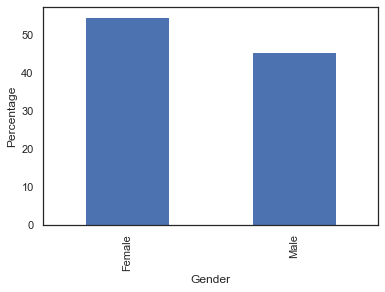

In [16]:
plt.xlabel("Gender")
plt.ylabel("Percentage")
dataset_byGender.plot(kind='bar')

#### 54.6%of the dataset are females and  45.4% are males

### AGE BAND

In [17]:
re3  = df["GEN"].replace({1.0:"15<", 2.0: "15-19",3.0: "20-29",4.0: "30-39",5.0: "40-49",6.0: "50-59",7.0: "60>="}, inplace=True)
AgeB= df["GEN"].value_counts()

AgeB

C:\Users\user2222\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


40-49    93
50-59    93
30-39    68
60>=     61
20-29    51
15-19     2
Name: GEN, dtype: int64

In [18]:

fig = go.Figure(go.Funnel(y=['50-59','40-49','30-39','60 above','20-29','15-19'], x=[93,93,68,61,51,2]))
fig.show()

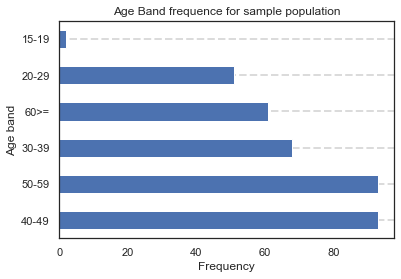

In [19]:
#Age Band
plt.xlabel("Frequency")
plt.ylabel("Age band")
AgeB.plot(kind='barh',)
plt.title("Age Band frequence for sample population")
plt.grid( linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

#### Most participants fall into age range of 40-49 and 50-59

### Prefecture

In [55]:
re2  = df["PRE"].replace({1.0: "Hokkaido", 2.0: "Aomori",3.0: "Iwate",4.0: "Miyagi",5.0: "Akita",6.0: "Yamagata",7.0: "Fukushima",8.0: "Ibaragi",9.0: "Tochigi",10.0: "Gunma", 11.0:'Saitama', 12.0:'Chiba', 13.0:'Tokyo', 14.0:'Kanagawa', 15.0:'Niigata', 16.0:'Toyama', 17.0:'Ishikawa', 18.0:'Fukui', 19.0:'Yamanashi', 20.0:'Nagano', 21.0:'Gifu', 22.0:'Shizuoka', 23.0:'Aichi', 24.0:'Mie', 25.0:'Shiga',26.0:'Kyoto',27.0:'Osaka',28.0:'Hyogo',29.0:'Nara',30.0:'Wakayama',31.0:'Tottori',32.0:'Shimane',33.0:'Okayama',34.0:'Hiroshima',35.0:'Yamaguchi',36.0:'Tokushima',37.0:'Kagawa',38.0:'Ehime',39.0:'Kouchi',40.0:'Fukuoka',41.0:'Saga',42.0:'Nagasaki',43.0:'Kumamoto',44.0:'Oita',45.0:'Miyazaki',46.0:'Kagoshima',47.0:'Okinawa' }, inplace=True)
series2 = df["PRE"].value_counts()
series2

Tokyo        48
Kanagawa     36
Osaka        36
Aichi        32
Saitama      19
Hyogo        18
Fukuoka      15
Hokkaido     15
Chiba        14
Gunma         9
Niigata       8
Kyoto         8
Okayama       8
Yamaguchi     8
Miyagi        8
Hiroshima     8
Ibaragi       7
Shiga         6
Oita          5
Shizuoka      5
Fukushima     4
Mie           4
Tochigi       4
Kumamoto      4
Ehime         3
Nara          3
Gifu          3
Okinawa       3
Yamagata      2
Tokushima     2
Yamanashi     2
Toyama        2
Shimane       2
Wakayama      2
Akita         2
Nagasaki      2
Kagoshima     2
Tottori       2
Iwate         1
Saga          1
Kouchi        1
Nagano        1
Fukui         1
Ishikawa      1
Aomori        1
Name: PRE, dtype: int64

In [56]:
pen1 = df['PRE'].value_counts(ascending=False)*100/368
pen1

Tokyo        13.043478
Kanagawa      9.782609
Osaka         9.782609
Aichi         8.695652
Saitama       5.163043
Hyogo         4.891304
Fukuoka       4.076087
Hokkaido      4.076087
Chiba         3.804348
Gunma         2.445652
Niigata       2.173913
Kyoto         2.173913
Okayama       2.173913
Yamaguchi     2.173913
Miyagi        2.173913
Hiroshima     2.173913
Ibaragi       1.902174
Shiga         1.630435
Oita          1.358696
Shizuoka      1.358696
Fukushima     1.086957
Mie           1.086957
Tochigi       1.086957
Kumamoto      1.086957
Ehime         0.815217
Nara          0.815217
Gifu          0.815217
Okinawa       0.815217
Yamagata      0.543478
Tokushima     0.543478
Yamanashi     0.543478
Toyama        0.543478
Shimane       0.543478
Wakayama      0.543478
Akita         0.543478
Nagasaki      0.543478
Kagoshima     0.543478
Tottori       0.543478
Iwate         0.271739
Saga          0.271739
Kouchi        0.271739
Nagano        0.271739
Fukui         0.271739
Ishikawa   

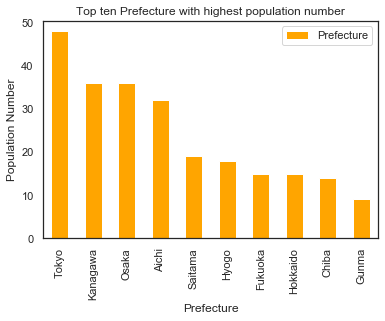

In [57]:
k = series2.head(10)
k.plot(kind='bar',color='orange', label='Prefecture')
plt.title("Top ten Prefecture with highest population number")
plt.xlabel("Prefecture")
plt.ylabel("Population Number")
plt.legend()
plt.show()

### Dataset by Region

In [58]:
re3  = df["ARE"].replace({1.0: "Hokkaido", 2.0: "Tohoku",3.0: "Kanto",4.0: "Chubu",5.0: "Kinki",6.0: "Chugoku",7.0: "Shikoku",8.0: "Kyushu"}, inplace=True)
series3 = df["ARE"].value_counts()
series3

Kanto       137
Kinki        77
Chubu        55
Kyushu       32
Chugoku      28
Tohoku       18
Hokkaido     15
Shikoku       6
Name: ARE, dtype: int64

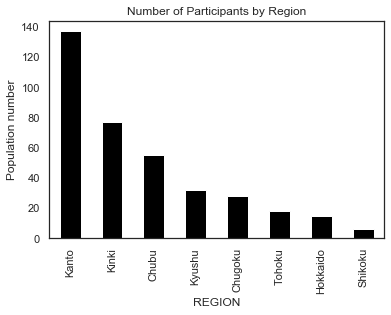

In [59]:
series3.plot(kind='bar',color='black')
plt.title("Number of Participants by Region")
plt.xlabel("REGION")
plt.ylabel("Population number")
plt.show()

#### The highest number of participants is from Kanto Region

### Exploring Occupation

In [60]:
#df['JOB'].astype(str)
re4  = df["JOB"].replace({1.0: "Civil-Servant", 2.0: "Exective",3.0: "Employee(Office based work)",4.0: "Employee(Manual work)",5.0: "Employee(Others)",6.0: "Self-employed",7.0: "Freelancer",8.0: "Housewife",9.0: "Part Time",10.0: "student", 11.0:'Others'}, inplace=True)
series4 = df["JOB"].value_counts()
series4

Part Time                      64
Employee(Office based work)    61
Housewife                      57
Employee(Others)               57
Employee(Manual work)          40
Others                         36
Self-employed                  18
student                        14
Civil-Servant                   9
Exective                        6
Freelancer                      6
Name: JOB, dtype: int64

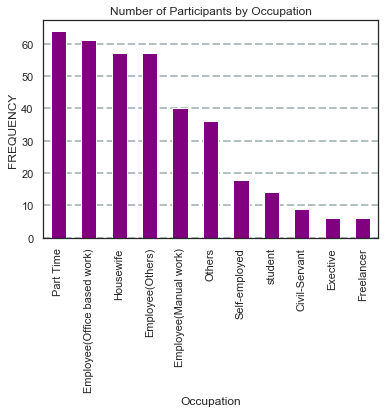

In [61]:
series4.plot(kind='bar', color='purple')
plt.title("Number of Participants by Occupation")
plt.xlabel("Occupation")
plt.ylabel("FREQUENCY")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### Marital Status

In [62]:
re5 = df["MAR"].replace({1.0: "Single", 2.0: "Married"}, inplace=True)

In [63]:
#Dataset by Marital Status in percentage
dataset_byMaritalStatus = df['MAR'].value_counts(ascending=False)*100/368 
dataset_byMaritalStatus

Married    61.141304
Single     38.858696
Name: MAR, dtype: float64

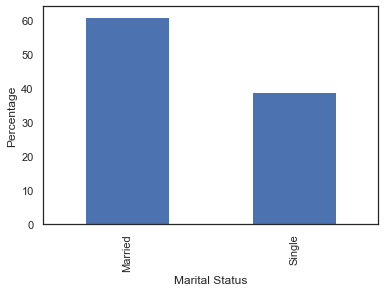

In [64]:
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
dataset_byMaritalStatus.plot(kind='bar')

### Total number of participants with kids and no kid

In [67]:
re6 = df["CHI"].replace({1.0: "Kids", 2.0: "No Kids"}, inplace=True)
dataset_byKids = df['CHI'].value_counts(ascending=False)*100/368
dataset_byKids

Kids       52.717391
No Kids    47.282609
Name: CHI, dtype: float64

Text(0, 0.5, 'Number of participants')

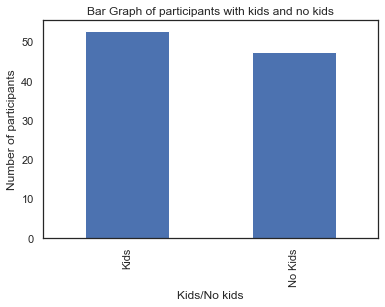

In [68]:
ax  = dataset_byKids.plot(kind='bar')
ax.set_title("Bar Graph of participants with kids and no kids", y=1)
ax.set_xlabel('Kids/No kids')
ax.set_ylabel('Number of participants')

### MOBILE OS VERSION

In [69]:
z= df["q2c1"].value_counts()
y= df["q2c2"].value_counts()
x= df["q2c3"].value_counts()
w= df["q2c4"].value_counts()
w

0.0    366
1.0      2
Name: q2c4, dtype: int64

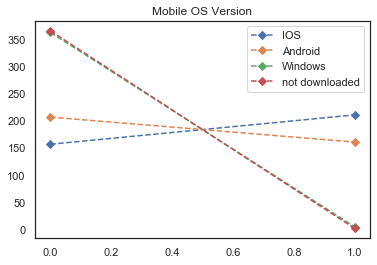

In [70]:
x=[0,1]
q2c1=[157,211]
q2c2=[207,161]
q2c3=[363,5]
q2c4=[366,2]
plt.plot(x,q2c1, linestyle= 'dashed', marker='D', label='IOS')
plt.plot(x,q2c2, linestyle= 'dashed', marker='D', label='Android' )
plt.plot(x,q2c3, linestyle= 'dashed', marker='D', label='Windows' )
plt.plot(x,q2c4, linestyle= 'dashed', marker='D', label='not downloaded' )
plt.title("Mobile OS Version")
plt.legend()
plt.show()

#### Most participants make use of Android O.S Version which was downloaded from online store

### DIFFERENT USE OF THE APPLICATION

In [71]:
diffU  = df["q3"].replace({1.0: "Education", 2.0: "Monitoring",3.0: "Fitness",4.0: "Diagnosis",5.0: "Treatment",6.0: "Other"}, inplace=True)
sdiffU = df["q3"].value_counts()
sdiffU

Monitoring    123
Fitness        73
Other          65
Diagnosis      52
Education      48
Treatment       7
Name: q3, dtype: int64

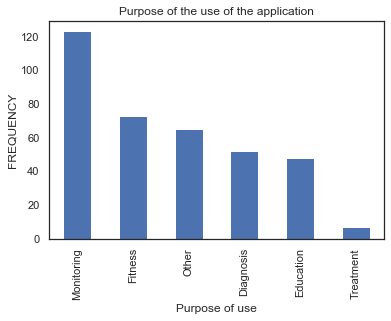

In [72]:
sdiffU.plot(kind='bar')
plt.title("Purpose of the use of the application")
plt.xlabel("Purpose of use")
plt.ylabel("FREQUENCY")
plt.show()

In [120]:
 Usepercent= df['q3'].value_counts(ascending=False)*100/368
 Usepercent

Monitoring    33.423913
Fitness       19.836957
Other         17.663043
Diagnosis     14.130435
Education     13.043478
Treatment      1.902174
Name: q3, dtype: float64

#### 33.4% of the participants used it for Monitoring, 19.8% used it for Fitness, 14.1% used it for diagnosis, 13% used it for Education, 1.9% used it for Treatment and 17.7% used it for other purpose. 

### ENGAGEMENT -is the app entertaining ?

In [74]:
f= df["q4s2"].value_counts()
f


2.0    122
3.0    108
4.0     76
5.0     31
1.0     31
Name: q4s2, dtype: int64

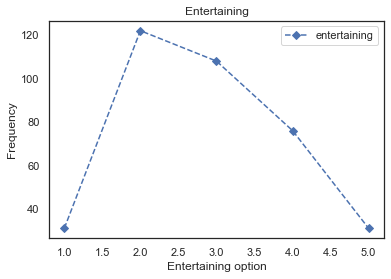

In [75]:
x= [1.0,2.0,3.0,4.0,5.0]
q4s2=[31,122,108,76,31]
plt.plot(x,q4s2, linestyle= 'dashed', marker='D', label='entertaining')
plt.title("Entertaining")
plt.ylabel('Frequency')
plt.xlabel('Entertaining option')
plt.legend()
plt.show()

#### The analysis shows that 31 participants strongly agreed that the application is entertaining, 122 participants agreed, 108 have not decided, 76 disagree and 31 strongly disagree. The number of participants that agreed is much more, we can conclude that the application is entertaining.

### FUNCTIONALITY - Performance, Ease of use and Navigation.

In [76]:
#Functionality
b= df["q4s3"].value_counts()
c= df["q4s4"].value_counts()
d= df["q4s5"].value_counts()
d

2.0    177
3.0    108
1.0     38
4.0     31
5.0     14
Name: q4s5, dtype: int64

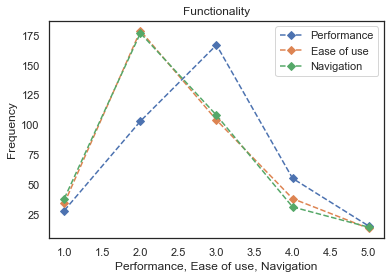

In [77]:
x= [1.0,2.0,3.0,4.0,5.0]# 1 stands for strongly agree, agree, not decided, disagree and strongly disagree.
q4s3=[28,103,167,55,15]
q4s4=[34,179,104,38,13]
q4s5=[38,177,108,31,14]
plt.plot(x,q4s3, linestyle= 'dashed', marker='D', label='Performance')
plt.plot(x,q4s4, linestyle= 'dashed', marker='D',label='Ease of use' )
plt.plot(x,q4s5, linestyle= 'dashed', marker='D',label='Navigation' )
plt.title("Functionality")
plt.ylabel('Frequency')
plt.xlabel('Performance, Ease of use, Navigation')
plt.legend()
plt.show()
#q4s3 is for performance, q4s4 is for Ease of use and q4s5 is for navigation

#### The application is easy to use and navigate

### AESTHETICS  -  Layout, Graphics, Visual Appeal

In [78]:
#AESTHETICS
g= df["q4s6"].value_counts()
h= df["q4s7"].value_counts()
i= df["q4s8"].value_counts()
i

2.0    154
3.0    130
4.0     38
1.0     35
5.0     11
Name: q4s8, dtype: int64

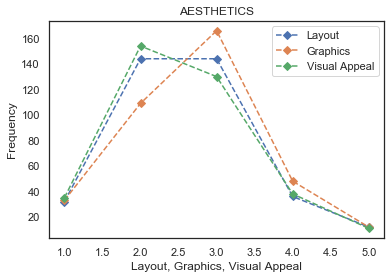

In [79]:
x= [1.0,2.0,3.0,4.0,5.0]# 1 stands for strongly agree, agree, not decided, disagree and strongly disagree.
q4s6=[32,144,144,36,12]
q4s7=[33,109,166,48,12]
q4s8=[35,154,130,38,11]
plt.plot(x,q4s6, linestyle= 'dashed', marker='D', label='Layout')
plt.plot(x,q4s7, linestyle= 'dashed', marker='D',label='Graphics' )
plt.plot(x,q4s8, linestyle= 'dashed', marker='D',label='Visual Appeal' )
plt.title("AESTHETICS")
plt.ylabel('Frequency')
plt.xlabel('Layout, Graphics, Visual Appeal')
plt.legend()
plt.show()

#### This analysis shows that the app looks good and have a good layout.

### PRIVACY, ETHICS and INFORMATION - Visual, Quality, Credibility, Confidentiality and privacy, ethical

In [80]:
j= df["q4s9"].value_counts()
k= df["q4s10"].value_counts()
l= df["q4s11"].value_counts()
m= df["q4s12"].value_counts()
n= df["q4s13"].value_counts()
j

3.0    162
2.0    133
4.0     40
1.0     22
5.0     11
Name: q4s9, dtype: int64

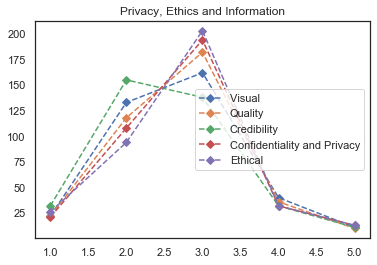

In [81]:
q4s9=[22,133,162,40,11]
q4s10=[22,118,182,36,10]
q4s11=[32,155,138,32,11]
q4s12=[21,108,194,32,13]
q4s13=[26,94,203,32,13]
plt.plot(x,q4s9, linestyle= 'dashed', marker='D', label='Visual ')
plt.plot(x,q4s10, linestyle= 'dashed', marker='D',label='Quality' )
plt.plot(x,q4s11, linestyle= 'dashed', marker='D',label='Credibility' )
plt.plot(x,q4s12, linestyle= 'dashed', marker='D',label='Confidentiality and Privacy' )
plt.plot(x,q4s13, linestyle= 'dashed', marker='D',label='Ethical' )
plt.title("Privacy, Ethics and Information")
plt.legend()
plt.show()

#### Overall Rating

In [82]:
o= df["q4s14"].value_counts()
p= df["q4s15"].value_counts()
o

2.0    158
3.0    143
1.0     32
4.0     24
5.0     11
Name: q4s14, dtype: int64

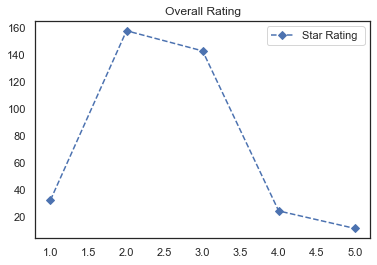

In [83]:
x= [1.0,2.0,3.0,4.0,5.0]
q4s14=[32,158,143,24,11]
q4s15=[25,133,160,36,14]
plt.plot(x,q4s14, linestyle= 'dashed', marker='D', label='Star Rating ')
plt.title("Overall Rating")
plt.legend()
plt.show()

#### This analysis shows that the  application is well rated and of good performance.

### Gender usage by Age

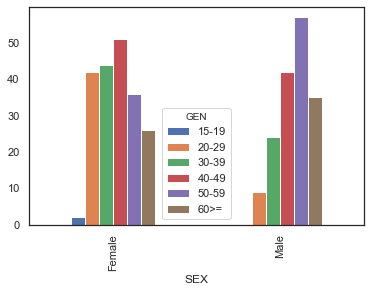

In [84]:
data1 =  pd.DataFrame(df, columns= ['SEX','GEN'])
pd.crosstab(data1['SEX'],data1['GEN']).plot.bar()

#### Most male participants that used the application fall into the age range of 50-59 and most female participants that used the application fall into the age range of 40-49

### Purpose and Operating System(s)

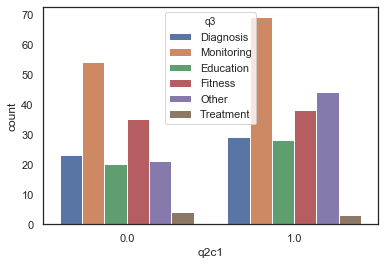

In [85]:
# IOS operating system
sns.countplot(x="q2c1", hue='q3', data=df)
plt.show()

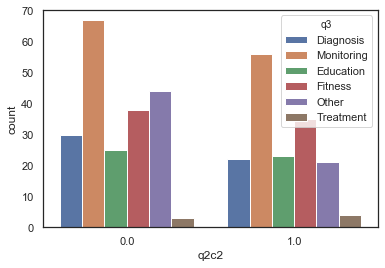

In [86]:
# Android operating system
sns.countplot(x="q2c2", hue='q3', data=df)
plt.show()

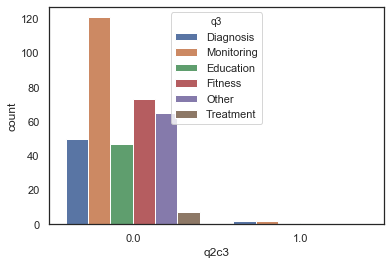

In [87]:
# Windows operating system
sns.countplot(x="q2c3", hue='q3', data=df)
plt.show()

## Purpose with Age Band and Gender

C:\Users\user2222\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



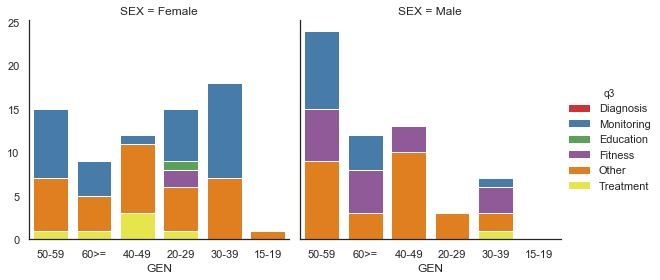

In [88]:
fig =sns.FacetGrid(data=df,col='SEX',hue='q3',palette='Set1',size=4,aspect=1).map(sns.countplot,'GEN',order=df.GEN.unique()).add_legend()

### Rating based on gender usage and Age

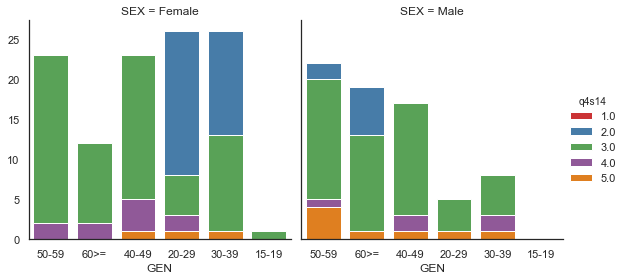

In [89]:
fig =sns.FacetGrid(data=df,col='SEX',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'GEN',order=df.GEN.unique()).add_legend()

### Rating based on Gender usage and Marital Status

In [90]:
sns.set_style('white')


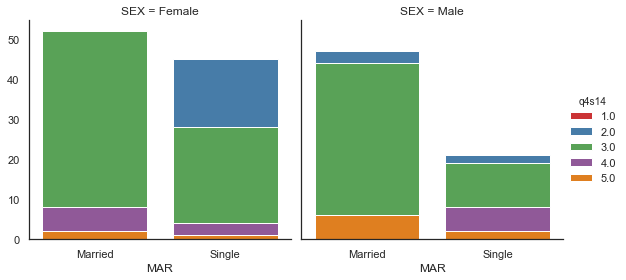

In [91]:
fig =sns.FacetGrid(data=df,col='SEX',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'MAR',order=df.MAR.unique()).add_legend()

### Operating system(s) based on Age and Gender

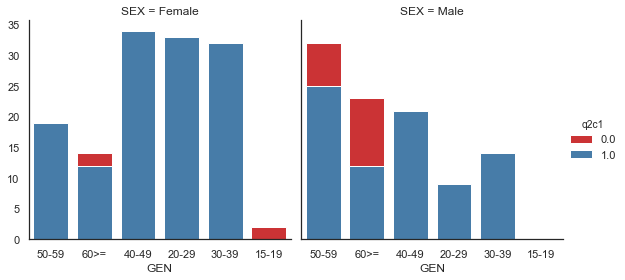

In [92]:
#IOS operating system
fig =sns.FacetGrid(data=df,col='SEX',hue='q2c1',palette='Set1',size=4,aspect=1).map(sns.countplot,'GEN',order=df.GEN.unique()).add_legend()

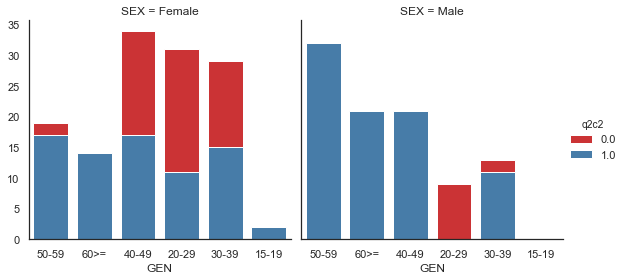

In [93]:
#Android operating system
fig =sns.FacetGrid(data=df,col='SEX',hue='q2c2',palette='Set1',size=4,aspect=1).map(sns.countplot,'GEN',order=df.GEN.unique()).add_legend()

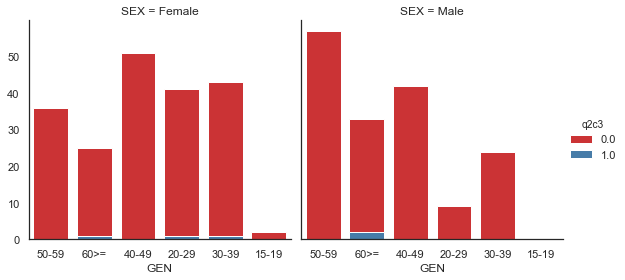

In [94]:
#Windows operating system
fig =sns.FacetGrid(data=df,col='SEX',hue='q2c3',palette='Set1',size=4,aspect=1).map(sns.countplot,'GEN',order=df.GEN.unique()).add_legend()

### Purpose based on Age Band

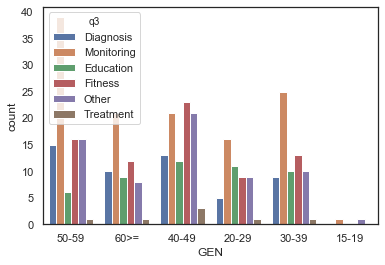

In [95]:
sns.countplot(x="GEN", hue='q3', data=df)
plt.show()

### Rating of operating system versions based on Kids and Occupation.

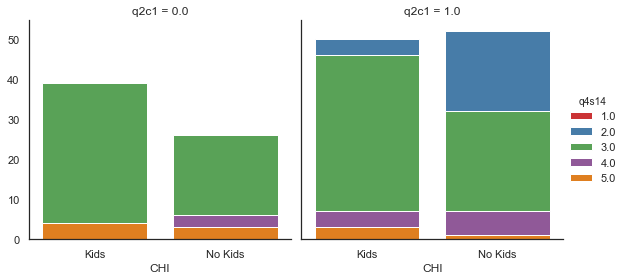

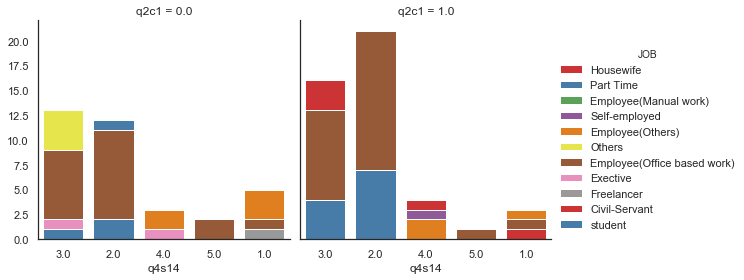

In [96]:
#IOS(q2c1) Operating System Version
fig =sns.FacetGrid(data=df,col='q2c1',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'CHI',order=df.CHI.unique()).add_legend()
fig =sns.FacetGrid(data=df,col='q2c1',hue='JOB',palette='Set1',size=4,aspect=1).map(sns.countplot,'q4s14',order=df.q4s14.unique()).add_legend()

#### Most Participants with no  kids make use of the IOS operating system version of the application especially Employees and part time workers

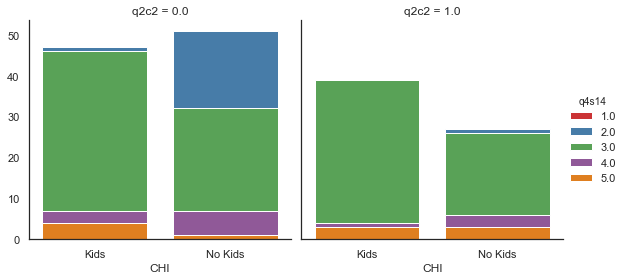

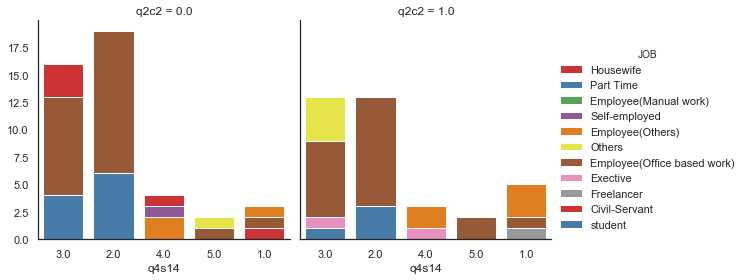

In [97]:
#Android Operating System (q2c2) Version
fig =sns.FacetGrid(data=df,col='q2c2',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'CHI',order=df.CHI.unique()).add_legend()
fig =sns.FacetGrid(data=df,col='q2c2',hue='JOB',palette='Set1',size=4,aspect=1).map(sns.countplot,'q4s14',order=df.q4s14.unique()).add_legend()

#### Most Participants with no kids make use of the IOS operating system version of the application especially Employees and part time workers

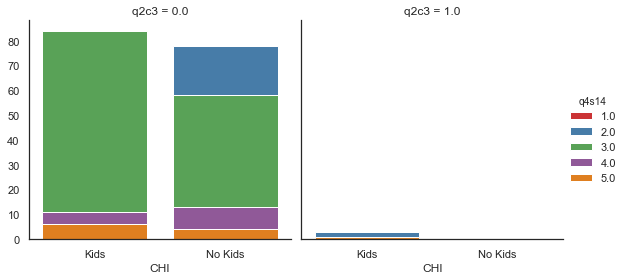

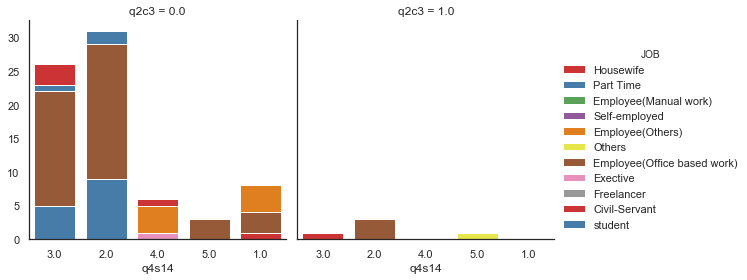

In [98]:
#Windows Operating System Version
fig =sns.FacetGrid(data=df,col='q2c3',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'CHI',order=df.CHI.unique()).add_legend()
fig =sns.FacetGrid(data=df,col='q2c3',hue='JOB',palette='Set1',size=4,aspect=1).map(sns.countplot,'q4s14',order=df.q4s14.unique()).add_legend()

#### House wife with kids and Employee(Office based work) with kids are the major users of the windows version of the application.

### Rating based on the purpose of the use of the application by Sex

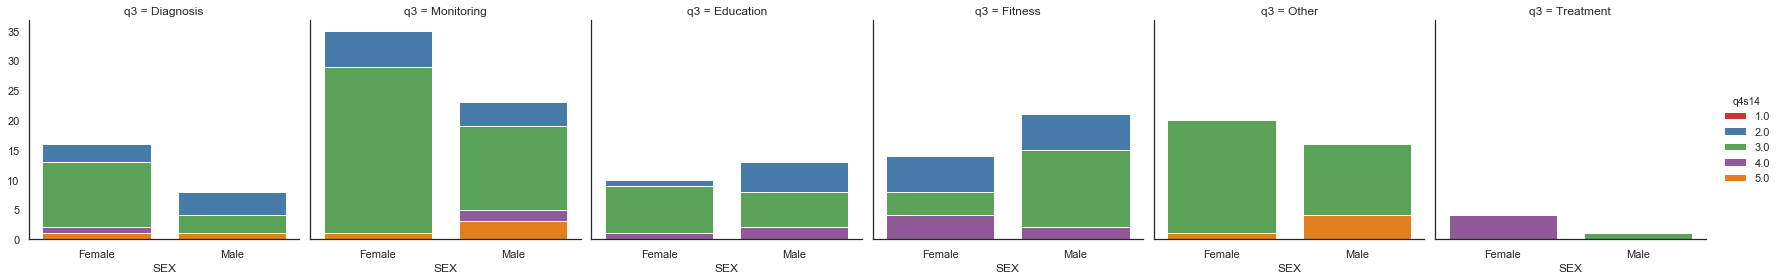

In [99]:
fig =sns.FacetGrid(data=df,col='q3',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'SEX',order=df.SEX.unique()).add_legend()


#### The analysis shows that the application is best good for Diagnosis, Education, Fitness and Monitoring.

### Rating based on performance,Engagement, and Ease of use

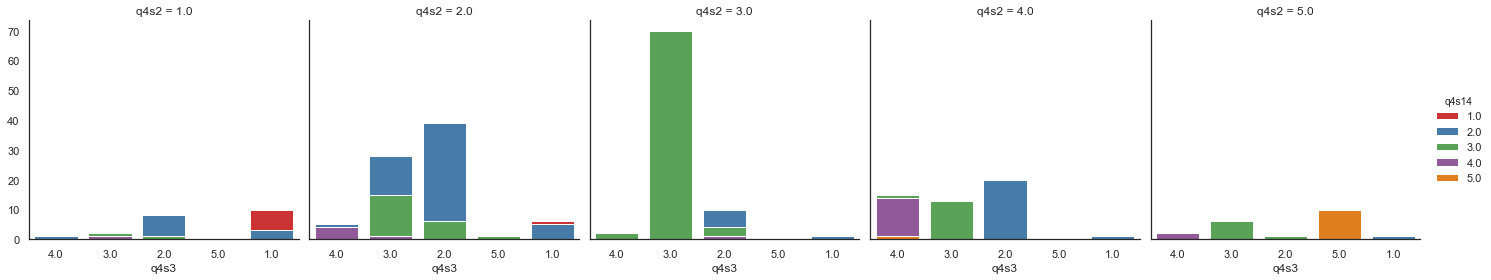

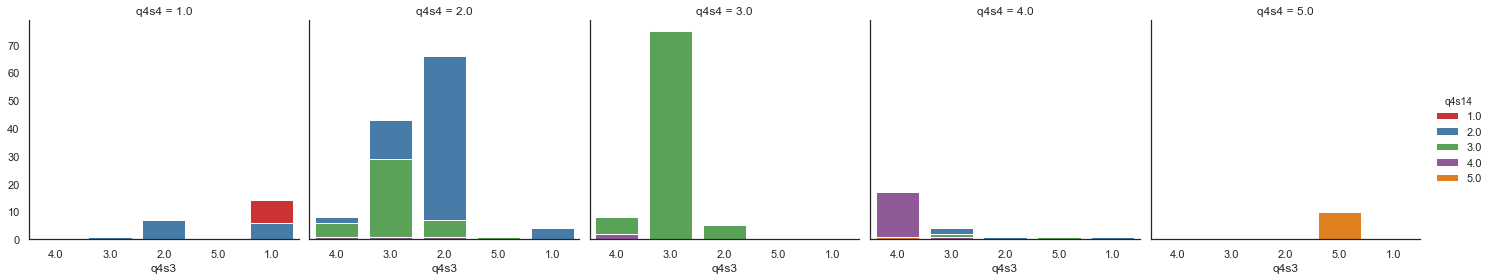

In [100]:
fig =sns.FacetGrid(data=df,col='q4s2',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'q4s3',order=df.q4s3.unique()).add_legend()
fig =sns.FacetGrid(data=df,col='q4s4',hue='q4s14',palette='Set1',size=4,aspect=1).map(sns.countplot,'q4s3',order=df.q4s3.unique()).add_legend()

#### The analysis shows that  the participants are satisfield with the performance of the application, interactivity and ease of use.

## SUMMARY

### All participants had to have utilized mHealth apps, which means they had to be familiar with them and have used them. I filtered out incomplete questionnaires and got 368 valid responses. I calculated the demographics characteristics of every response, and I found that 54.6 percent of participants were females and 45.4 percent were males.

### 50.54% of participants belonged to  the 40-49 age group and 50-59 age group. 61.1% of the participants were married and 38.9% were single, 52.7% of partcipants were with kids and 47.3% were with no kids. Most participants in this study were part time workers.

### The prefecture with the highest number of participants is Tokyo and by region is Kanto. Most participants make use of Android O.S version which was downloaded from online. 33.4% of the participants used the mHealth application for Monitoring, 19.8% used it for Fitness, 14.1% used it for diagnosis, 13% used it for Education, 1.9% used it for Treatment and 17.7% used it for other purposes. 



### For navigation, 38 participants strongly agreed that it is easy to navigate, 177 agreed, 108 have not decided , 31 disagreed and 14 strongly disagreed.
### 34 participants  strongly agreed that the application is easy to use, 179 partcipants agreed, 104 have not decided, 38 disagree and 13 strongly disagree.
### 28 participants strongly agreed that the application is of good performance,103 participants agreed, 167 have not decided, 55 disagree and 15 strong disagree.
### The analysis shows that 31 participants strongly agreed that the application is entertaining, 122 participants agreed, 108 have not decided, 76 disagree and 31 strongly disagree. The number of participants that agreed is much more, we can conclude that the application is entertaining.

#### Overall Rating: 32 participants strongly agreed that the overall rating of the application is good, 158 participants agreed, 143 participants have not decided , 24 participants disagreed and 11 participants strongly disagreed. 

## DATA MODELLING

In [101]:
#view columns
data.columns

Index(['MID', 'DAY', 'SEX', 'AGE', 'GEN', 'PRE', 'ARE', 'JOB', 'MAR', 'CHI',
       'q1t1', 'q2c1', 'q2c2', 'q2c3', 'q2c4', 'q3', 'q4s1', 'q4s2', 'q4s3',
       'q4s4', 'q4s5', 'q4s6', 'q4s7', 'q4s8', 'q4s9', 'q4s10', 'q4s11',
       'q4s12', 'q4s13', 'q4s14', 'q4s15', 'q5'],
      dtype='object')

In [102]:
#total amount of rows and colunms

total_rows=len(data.axes[0])

print("total rows", total_rows )


total_cols=len(data.axes[1])

print("total columns", total_cols )

total rows 368
total columns 32


#### NOTE: Rating column is the target column for prediction

#### So lets view the Rating column only

In [103]:
#### View Overall star rating column 
data['q4s14'].value_counts()

2.0    158
3.0    143
1.0     32
4.0     24
5.0     11
Name: q4s14, dtype: int64

### 2. DATA PREPROCESSING : We will perform data discretization or encoding and Normalise using MInmax.

#### Firstly we check dataset for any categorical or object columns

In [104]:
#check datatypes
data.dtypes

MID      float64
DAY       object
SEX      float64
AGE      float64
GEN      float64
PRE      float64
ARE      float64
JOB      float64
MAR      float64
CHI      float64
q1t1      object
q2c1     float64
q2c2     float64
q2c3     float64
q2c4     float64
q3       float64
q4s1     float64
q4s2     float64
q4s3     float64
q4s4     float64
q4s5     float64
q4s6     float64
q4s7     float64
q4s8     float64
q4s9     float64
q4s10    float64
q4s11    float64
q4s12    float64
q4s13    float64
q4s14    float64
q4s15    float64
q5       float64
dtype: object

#### From output above we see that Day and q1t1  columns are object.
#### so we need to encode them to numeric values this is where data discretization is done.

In [105]:
re3  = data["q4s14"].replace({1.0:"STRONGLY AGREE", 2.0: "AGREE",3.0: "NOT DECIDED",4.0: "DISAGREE",5.0: "STRONGLY DISAGREE"}, inplace=True)

In [106]:
data['q4s14'].value_counts()

AGREE                158
NOT DECIDED          143
STRONGLY AGREE        32
DISAGREE              24
STRONGLY DISAGREE     11
Name: q4s14, dtype: int64

### Data Encoding or Discretization using pd.get_dummies

In [107]:
dfencoddata= pd.get_dummies(df)
#dfencoddata
print (np.shape(dfencoddata))
print (dfencoddata.columns)
#view first five rows
dfencoddata[:5]

(368, 398)
Index(['MID', 'AGE', 'q2c1', 'q2c2', 'q2c3', 'q2c4', 'q4s1', 'q4s2', 'q4s3',
       'q4s4',
       ...
       'q1t1_sanarawayanata', 'q1t1_scale up', 'q1t1_withwellness',
       'q1t1_y mobile', 'q3_Diagnosis', 'q3_Education', 'q3_Fitness',
       'q3_Monitoring', 'q3_Other', 'q3_Treatment'],
      dtype='object', length=398)


MID   AGE  q2c1  q2c2  q2c3  q2c4  q4s1  q4s2  q4s3  q4s4  ...  \
1   1.000003e+09  56.0   0.0   1.0   0.0   0.0   3.0   4.0   4.0   4.0  ...   
7   1.000004e+09  54.0   0.0   1.0   0.0   0.0   4.0   2.0   3.0   2.0  ...   
15  1.000009e+09  60.0   1.0   0.0   0.0   0.0   3.0   3.0   3.0   2.0  ...   
19  1.000009e+09  60.0   0.0   1.0   0.0   0.0   3.0   1.0   3.0   2.0  ...   
25  1.000014e+09  65.0   0.0   1.0   0.0   0.0   3.0   3.0   3.0   3.0  ...   

    q1t1_sanarawayanata  q1t1_scale up  q1t1_withwellness  q1t1_y mobile  \
1                     0              0                  0              0   
7                     0              0                  0              0   
15                    0              0                  0              0   
19                    0              0                  0              0   
25                    0              0                  0              0   

    q3_Diagnosis  q3_Education  q3_Fitness  q3_Monitoring  q3_Other  \
1              1             0           0              0         0   
7              0             0           0              1         0   
15             0             0           0              1         0   
19             0             0           0              1         0   
25             0             1           0              0         0   

    q3_Treatment  
1              0  
7              0  
15             0  
19             0  
25             0  

[5 rows x 398 columns]

#### From output above, data encoding has been done on Day and q1t1  columns.

### NORMALISE DATA: using MinMax : For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [108]:
#### Normalize data
from sklearn.preprocessing import MinMaxScaler

#normalize before dropping the target columns in other to use for correlation feature selection
scaler = MinMaxScaler() 
s_for_correlation= scaler.fit_transform(dfencoddata)

#convert back to dataframe
s_for_correlation2 = pd.DataFrame(s_for_correlation, columns=dfencoddata.columns,index=data.index)



#normalise while dropping target columns and encode the rest of the data in other to use for other feature selection
drpped= data.drop(['q4s14'],axis=1)
dfencoded= pd.get_dummies(drpped)


scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dfencoded)

print (np.shape(scaled_values))


#convert back to dataframe
scaled_values_to_df = pd.DataFrame(scaled_values, columns=dfencoded.columns,index=data.index)

#show first five rows of normalised data

scaled_values_to_df.head()

(368, 323)


MID  SEX       AGE  GEN       PRE       ARE  JOB  MAR  CHI  q2c1  \
1   0.000000  1.0  0.622951  0.8  0.282609  0.285714  0.7  1.0  0.0   0.0   
7   0.000154  1.0  0.590164  0.8  0.260870  0.285714  0.8  1.0  0.0   0.0   
15  0.000596  1.0  0.688525  1.0  0.565217  0.571429  0.3  0.0  1.0   1.0   
19  0.000673  1.0  0.688525  1.0  0.478261  0.428571  0.5  1.0  0.0   0.0   
25  0.001139  1.0  0.770492  1.0  0.282609  0.285714  0.7  1.0  0.0   0.0   

    ...  q1t1_miles  q1t1_nai  q1t1_nsi  q1t1_omron connect  \
1   ...         0.0       0.0       0.0                 0.0   
7   ...         0.0       0.0       0.0                 0.0   
15  ...         0.0       0.0       0.0                 0.0   
19  ...         0.0       0.0       0.0                 0.0   
25  ...         0.0       0.0       0.0                 0.0   

    q1t1_omuron connect  q1t1_pokean  q1t1_sanarawayanata  q1t1_scale up  \
1                   0.0          0.0                  0.0            0.0   
7                   0.0          0.0                  0.0            0.0   
15                  0.0          0.0                  0.0            0.0   
19                  0.0          0.0                  0.0            0.0   
25                  0.0          0.0                  0.0            0.0   

    q1t1_withwellness  q1t1_y mobile  
1                 0.0            0.0  
7                 0.0            0.0  
15                0.0            0.0  
19                0.0            0.0  
25                0.0            0.0  

[5 rows x 323 columns]

#### From output above the dataset have been normalised to values between 0s and 1s

### 3. FEATURE SELECTION

#### Lasso

In [122]:
#using lasso
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

X= scaled_values_to_df  #Feature Matrix
y = data["q4s14"] #target
scaler = StandardScaler()
scaler.fit(X)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X.fillna(0)), y)

lasso_for_training=sel_.fit_transform(X.fillna(0), y)


#print (np.shape(lasso_for_training))

sel_support = sel_.get_support()

#print(sel_support)

selected_feat = X.columns[(sel_.get_support())]


print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(selected_feat)

print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



total features: 323
selected features: 75
Index(['MID', 'SEX', 'GEN', 'PRE', 'JOB', 'MAR', 'CHI', 'q2c1', 'q2c2', 'q2c3',
       'q3', 'q4s1', 'q4s2', 'q4s3', 'q4s4', 'q4s5', 'q4s6', 'q4s7', 'q4s8',
       'q4s9', 'q4s10', 'q4s11', 'q4s12', 'q4s13', 'q4s15', 'q5',
       'DAY_6/8/2022 19:01', 'DAY_6/8/2022 19:04', 'DAY_6/8/2022 19:05',
       'DAY_6/8/2022 19:06', 'DAY_6/8/2022 19:07', 'DAY_6/8/2022 19:08',
       'DAY_6/8/2022 19:09', 'DAY_6/8/2022 19:10', 'DAY_6/8/2022 19:13',
       'DAY_6/8/2022 19:16', 'DAY_6/8/2022 19:20', 'DAY_6/8/2022 19:21',
       'DAY_6/8/2022 19:23', 'DAY_6/8/2022 19:24', 'DAY_6/8/2022 19:26',
       'DAY_6/8/2022 19:29', 'DAY_6/8/2022 19:30', 'DAY_6/8/2022 19:32',
       'DAY_6/8/2022 19:34', 'DAY_6/8/2022 19:37', 'DAY_6/8/2022 19:43',
       'DAY_6/8/2022 19:44', 'DAY_6/8/2022 19:49', 'DAY_6/8/2022 20:08',
       'DAY_6/8/2022 20:12', 'DAY_6/8/2022 20:28', 'DAY_6/8/2022 20:35',
       'DAY_6/8/2022 20:45', 'DAY_6/8/2022 20:46', 'DAY_6/8/2022 20:48',
     

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



### 4.   TRAINING WITH FEATURE SELECTION METHOD USING SUPERVISED LEARNING ALGORITHMS

In [110]:
#Using lasso

X=lasso_for_training

print (np.shape(X))

y = data['q4s14']

print (np.shape(y))

(368, 75)
(368,)


#### build the training and testing sets (80% For training, 20% for testing)

In [111]:
# build the training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Gausian Naive Bayes

In [112]:
#using gausian Naive Bayes with chisquare feature selection
from sklearn.naive_bayes import GaussianNB
binary_model =  GaussianNB()
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is:", base_rf_score)

Training accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is: 0.3979591836734694
Testing accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is: 0.2972972972972973


#### Logistic Regression

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
binary_predictions = logmodel.predict(X_test)

train_acc = logmodel.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy Of Logistic Regression for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Logistic Regression for lasso(embedded method) Feature selection is:", base_rf_score)

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Training accuracy Of Logistic Regression for lasso(embedded method) Feature selection is: 0.7857142857142857
Testing accuracy of Logistic Regression for lasso(embedded method) Feature selection is: 0.6891891891891891


#### Decision Tree

In [114]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Performing training
clf_entropy.fit(X_train, y_train)
binary_predictions = clf_entropy.predict(X_test)

train_acc = clf_entropy.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy Of Decision tree for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Decision tree for lasso(embedded method) Feature selection is:", base_rf_score)

Training accuracy Of Decision tree for lasso(embedded method) Feature selection is: 0.7891156462585034
Testing accuracy of Decision tree for lasso(embedded method) Feature selection is: 0.7162162162162162


#### Random Forest

In [115]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
binary_predictions = clf.predict(X_test)

train_acc = clf.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score
print("Training accuracy Of Random Forest for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Random Forest for lasso(embedded method) Feature selection is:", base_rf_score)

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Training accuracy Of Random Forest for lasso(embedded method) Feature selection is: 0.9931972789115646
Testing accuracy of Random Forest for lasso(embedded method) Feature selection is: 0.7702702702702703


#### K-Neighbour

In [116]:
#K-Neighbour Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
binary_predictions = knn.predict(X_test)

train_acc = knn.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score
print("Training accuracy Of K-Neighbour for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of K-Neighbour for lasso(embedded method) Feature selection is:", base_rf_score)

Training accuracy Of K-Neighbour for lasso(embedded method) Feature selection is: 0.7380952380952381
Testing accuracy of K-Neighbour for lasso(embedded method) Feature selection is: 0.6621621621621622


## 5. MODEL EVALUATION WITH CONFUSION MATRIX AND PREDICTION USING RANDOM FOREST CLASSIFIER

In [117]:
#RandomForestClassifier
from sklearn.metrics import confusion_matrix
predictions = clf_entropy.predict(X_test) 

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

            AGREE       0.71      0.94      0.81        31
         DISAGREE       0.50      0.67      0.57         3
      NOT DECIDED       0.93      0.71      0.81        35
   STRONGLY AGREE       1.00      0.25      0.40         4
STRONGLY DISAGREE       1.00      1.00      1.00         1

         accuracy                           0.78        74
        macro avg       0.83      0.71      0.72        74
     weighted avg       0.82      0.78      0.78        74

